In [117]:
import matplotlib
%matplotlib nbagg


from mpl_toolkits.basemap import Basemap, cm
# requires netcdf4-python (netcdf4-python.googlecode.com)
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt

In [118]:
dirPath = 'http://inside-dev1.nkn.uidaho.edu:8080/thredds/dodsC/' 

filename = 'agg_met_pr_1979_2015_WUSA.nc'
#fileName='agg_met_pr_1979_2015_WUSA.nc?lon[0:100:1385],lat[0:100:584],daily_accumulated_precipitation[0:1:0][0:1:0][0:1:0],day[0:1:13020]'

my_example_nc_file = dirPath+filename
fh = Dataset(my_example_nc_file, mode='r')

In [119]:
for v in fh.variables.keys():
...     print v

lon
lat
day
daily_accumulated_precipitation


In [120]:
lons = fh.variables['lon'][:]
lats = fh.variables['lat'][:]
tmax = fh.variables['daily_accumulated_precipitation'][50:51]

tmax_units = fh.variables['daily_accumulated_precipitation'].units

In [121]:
fh.close()

In [122]:
lon_0 = lons.mean()
lat_0 = lats.mean()

m = Basemap(width=5000000,height=3500000,
            resolution='l',projection='stere',\
            lat_ts=40,lat_0=lat_0,lon_0=lon_0)

In [123]:
# Because our lon and lat variables are 1D, 
# use meshgrid to create 2D arrays 
# Not necessary if coordinates are already in 2D arrays.
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)

<IPython.core.display.Javascript object>


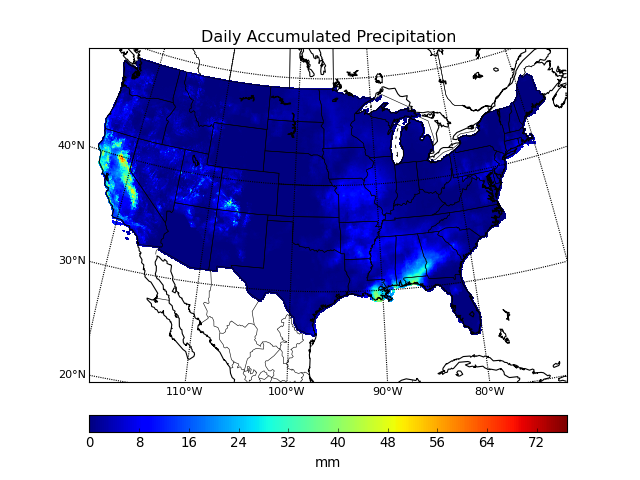

In [124]:
# Plot Data
cs = m.pcolor(xi,yi,np.squeeze(tmax))

# Add Grid Lines
m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.drawstates()
m.drawcountries()

# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.set_label(tmax_units)

# Add Title
plt.title('Daily Accumulated Precipitation')

plt.show()